# **Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_preprocessado = '/content/drive/My Drive/Colab/files/v-2/df_preprocessado.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Carregamento dos dados preparados
df_dados = pd.read_csv(file_preprocessado)

In [ ]:
len(df_dados)

1911

In [ ]:
len(df_dados.columns)

184

In [ ]:
df_dados['categoria'].value_counts()

,count
categoria,
XX,1107
CB,804


In [ ]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def train_optimize_evaluate(model, param_grid, df_dados, folds=10, seed=42):

    print("\nAlgoritmo:")
    print(model)

    # Separa variáveis preditoras (X) e alvo (y)
    X = df_dados.drop(columns=['categoria'])
    y = df_dados['categoria']

    # Divide os dados em treinamento e teste com estratificação
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

    # Informa o tamanho dos conjuntos de dados, treinamento e teste
    print(f"\nTamanho do Conjunto de Dados: {len(df_dados)} amostras")
    print(f"Tamanho do Conjunto de Treinamento: {len(X_train)} amostras")
    print(f"Tamanho do Conjunto de Teste: {len(X_test)} amostras")

    # Configura random_state se o modelo suportar
    if "random_state" in model.get_params():
        model.set_params(random_state=seed)

    # Validação cruzada com o modelo padrão
    cv_strategy = RepeatedStratifiedKFold(n_repeats=3, n_splits=folds, random_state=seed)
    default_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
    print("\nConjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):")
    print(f"Acurácia: {np.mean(default_scores) * 100:.2f}%")

    # Configura GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_strategy, scoring='accuracy', error_score=0)

    # Registra o início da execução
    start_time = time.time()

    # Busca melhores hiperparâmetros
    grid_result = grid_search.fit(X_train, y_train)

    # Registra o final da execução
    end_time = time.time()

    # Tempo de execução
    total_seconds = end_time - start_time
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60

    # Quantidade de combinações de valores de hiperparâmetros
    num_combinations = len(grid_result.cv_results_['params'])

    # Resultados do GridSearchCV
    print("\nConjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):")
    print(f"Acurácia: {grid_result.best_score_ * 100:.2f}%")
    print(f"Tempo de execução do ajuste de hiperparâmetros: {int(hours)}:{int(minutes):02}:{int(seconds):02}")
    print(f'Quantidade de combinações de hiperparâmetros: {num_combinations}')
    print(f"Melhores hiperparâmetros: {grid_result.best_params_}")

    # Avaliação no conjunto de teste
    y_pred = grid_result.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    score = f1_score(y_test, y_pred, average='macro')
    print("\nConjunto de Teste - Resultados de Predições (melhores hiperparâmetros):")
    print(f"Acurácia: {accuracy * 100:.2f}%")
    print(f"Precisão: {precision * 100:.2f}%")
    print(f"Recall  : {recall * 100:.2f}%")
    print(f"F1-score: {score * 100:.2f}%")
    print("\nConjunto de Teste - Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("\nConjunto de Teste - Matriz de Confusão:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("\n")

    # Visualização da matriz de confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    plt.show()



Algoritmo:
KNeighborsClassifier()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.64%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 97.69%
Tempo de execução do ajuste de hiperparâmetros: 0:01:33
Quantidade de combinações de hiperparâmetros: 54
Melhores hiperparâmetros: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 97.65%
Precisão: 97.63%
Recall  : 97.55%
F1-score: 97.59%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.97      0.97      0.97       161
          XX       0.98      0.98      0.98       222

    accuracy                           0.98       

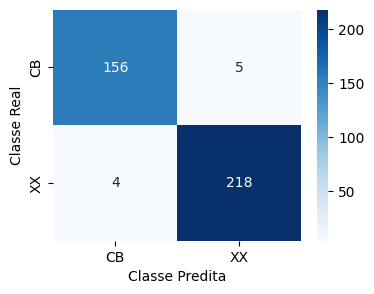

In [ ]:
# K_N_Neighbors 54
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],                            # Padrão: 5
    'weights': ['uniform', 'distance'],                  # Padrão: 'uniform'
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],       # Padrão: 'auto'
    'metric': ['euclidean', 'manhattan', 'minkowski']    # Padrão: 'minkowski'
}
train_optimize_evaluate(model, param_grid, df_dados)


Algoritmo:
ComplementNB()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.47%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 97.12%
Tempo de execução do ajuste de hiperparâmetros: 0:00:03
Quantidade de combinações de hiperparâmetros: 7
Melhores hiperparâmetros: {'alpha': 0.01}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 97.91%
Precisão: 98.04%
Recall  : 97.69%
F1-score: 97.85%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.99      0.96      0.97       161
          XX       0.97      0.99      0.98       222

    accuracy                           0.98       383
   macro avg       0.98      0.98      0.98       383
weighted avg       0.

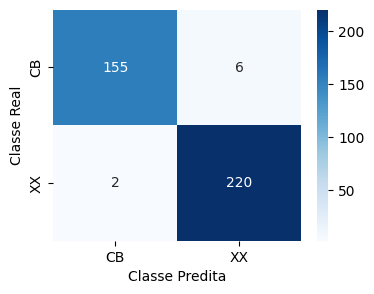

In [ ]:
# Naive_Bayes__ 7
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],    # Padrão: 1.0
}
train_optimize_evaluate(model, param_grid, df_dados)


Algoritmo:
DecisionTreeClassifier()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 97.51%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 96.09%
Tempo de execução do ajuste de hiperparâmetros: 0:00:20
Quantidade de combinações de hiperparâmetros: 64
Melhores hiperparâmetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 96.34%
Precisão: 96.33%
Recall  : 96.16%
F1-score: 96.24%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.96      0.95      0.96       161
          XX       0.96      0.97      0.97       2

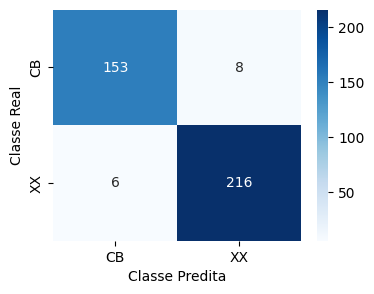

In [ ]:
# Decision_Tree 64
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],          # Padrão: 'gini'
    'min_samples_split': [2, 5],               # Padrão: 2
    'min_samples_leaf': [1, 2],                # Padrão: 1
    'max_depth': [10, 20, 30, 40],             # Padrão: None
    'max_features': ['sqrt', 'log2'],          # Padrão: None
    'class_weight': ['balanced']               # Padrão: None
}
train_optimize_evaluate(model, param_grid, df_dados)


Algoritmo:
LogisticRegression()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.75%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 97.73%
Tempo de execução do ajuste de hiperparâmetros: 0:01:18
Quantidade de combinações de hiperparâmetros: 27
Melhores hiperparâmetros: {'C': 10.0, 'class_weight': 'balanced', 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.17%
Precisão: 98.09%
Recall  : 98.17%
F1-score: 98.13%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.98      0.98      0.98       161
          XX       0.99      0.98      0.98       222

    accuracy                           0.98   

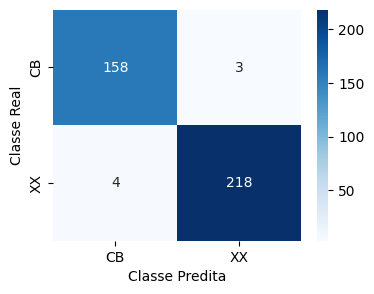

In [ ]:
# Log_Regress__ 27
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
param_grid = {
    'solver': ['lbfgs', 'newton-cholesky', 'saga'],    # Padrão = 'lbfgs'
    'penalty': ['l2'],                                 # Padrão = 'l2'
    'C': [0.1, 1.0, 10.0],                             # Padrão = 1.0
    'max_iter': [50, 100, 200],                        # Padrão = 100
    'class_weight': ['balanced']                       # Padrão = None
}
train_optimize_evaluate(model, param_grid, df_dados)


Algoritmo:
SVC()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.62%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 98.36%
Tempo de execução do ajuste de hiperparâmetros: 0:02:33
Quantidade de combinações de hiperparâmetros: 40
Melhores hiperparâmetros: {'C': 100, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.17%
Precisão: 98.09%
Recall  : 98.17%
F1-score: 98.13%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.98      0.98      0.98       161
          XX       0.99      0.98      0.98       222

    accuracy                           0.98       383
   macro avg       0.98   

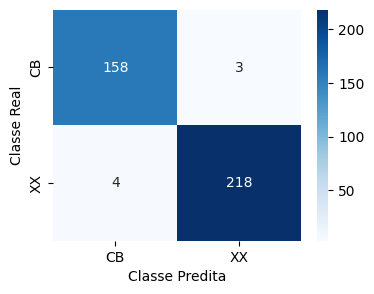

In [ ]:
# Sup_Vector_M_ 40
from sklearn.svm import SVC
model = SVC()
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],    # Padrão: 'rbf'
    'C': [0.01, 0.1, 1, 10, 100],                      # Padrão: 1
    'gamma': ['scale', 'auto'],                        # Padrão: 'scale'
    'class_weight': ['balanced']                       # Padrão: None
}
train_optimize_evaluate(model, param_grid, df_dados)


Algoritmo:
RandomForestClassifier()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 98.15%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 98.28%
Tempo de execução do ajuste de hiperparâmetros: 0:16:12
Quantidade de combinações de hiperparâmetros: 96
Melhores hiperparâmetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.43%
Precisão: 98.39%
Recall  : 98.39%
F1-score: 98.39%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.98      0.98      0.98       161
          XX       0.99      0

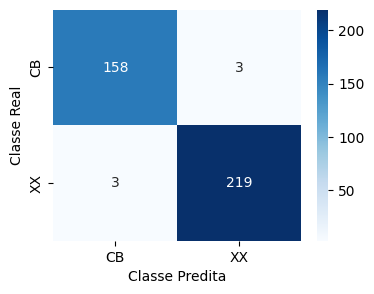

In [ ]:
# Random_Forest 96
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],      # Padrão: 'gini'
    'n_estimators': [100, 200],            # Padrão: 100
    'max_depth': [10, 20, 30],             # Padrão: None
    'min_samples_split': [2, 5],           # Padrão: 2
    'min_samples_leaf': [1, 2],            # Padrão: 1
    'max_features': ['sqrt', 'log2'],      # Padrão: 'sqrt'
    'class_weight': ['balanced']           # Padrão: None
}
train_optimize_evaluate(model, param_grid, df_dados)


Algoritmo:
GradientBoostingClassifier()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 97.38%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 97.95%
Tempo de execução do ajuste de hiperparâmetros: 0:15:49
Quantidade de combinações de hiperparâmetros: 96
Melhores hiperparâmetros: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.17%
Precisão: 98.17%
Recall  : 98.08%
F1-score: 98.12%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.98      0.98      0.98       161
          XX       0.98      0.99      0.98   

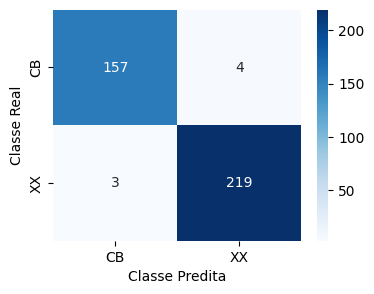

In [ ]:
# Grad_Boosting 96
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],                   # Padrão: 100
    'criterion': ['friedman_mse', 'squared_error'],    # Padrão: 'friedman_mse'
    'max_features': ['sqrt', 'log2'],                  # Padrão: None
    'max_depth': [3, 5],                               # Padrão: 3
    'min_samples_split': [2, 5],                       # Padrão: 2
    'min_samples_leaf': [1, 2]                         # Padrão: 1
}
train_optimize_evaluate(model, param_grid, df_dados)


Algoritmo:
Perceptron()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 97.12%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 97.23%
Tempo de execução do ajuste de hiperparâmetros: 0:00:17
Quantidade de combinações de hiperparâmetros: 32
Melhores hiperparâmetros: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 50, 'penalty': 'elasticnet'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 97.65%
Precisão: 97.82%
Recall  : 97.38%
F1-score: 97.58%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.99      0.96      0.97       161
          XX       0.97      0.99      0.98       222

    accuracy                           0.98       383
   macro avg       0

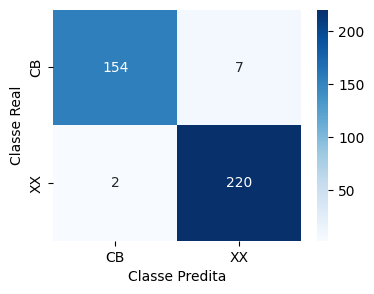

In [ ]:
# SL_Perceptron 32
from sklearn.linear_model import Perceptron
model = Perceptron()
param_grid = {
    'penalty': ['l2', 'elasticnet'],    # Padrão: None
    'max_iter': [50, 100, 500, 1000],   # Padrão: 1000
    'alpha': [0.0001, 0.001],           # Padrão: 0.0001
    'eta0': [0.1, 1.0]                  # Padrão: 1.0
}
train_optimize_evaluate(model, param_grid, df_dados)


Algoritmo:
MLPClassifier()

Tamanho do Conjunto de Dados: 1911 amostras
Tamanho do Conjunto de Treinamento: 1528 amostras
Tamanho do Conjunto de Teste: 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 98.21%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 98.25%
Tempo de execução do ajuste de hiperparâmetros: 2:09:19
Quantidade de combinações de hiperparâmetros: 96
Melhores hiperparâmetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'adam'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.43%
Precisão: 98.48%
Recall  : 98.31%
F1-score: 98.39%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.99      0.98      0.98       161
          XX       0.98      0.99      0.99       222

    accur

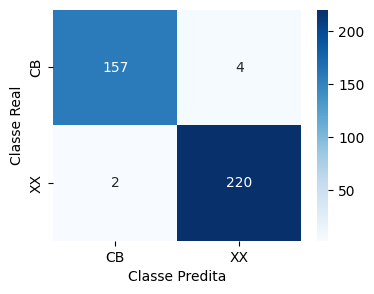

In [ ]:
# ML_Perceptron 96
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100)],     # Padrão: (100,)
    'learning_rate': ['adaptive', 'invscaling'],    # Padrão: 'constant'
    'activation': ['tanh', 'relu'],                 # Padrão: 'relu'
    'solver': ['adam', 'sgd', 'lbfgs'],             # Padrão: 'adam'
    'max_iter': [200, 300],                         # Padrão: 200
    'alpha': [0.0001, 0.05]                         # Padrão: 0.0001
}
train_optimize_evaluate(model, param_grid, df_dados)